In [613]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup

In [614]:
data = pd.read_csv('history_export.txt', sep="|", header = None,encoding='utf-16', nrows=2000, error_bad_lines=False)
data.columns = ["Time", "URL"]

C:\Users\Aakarsh\AppData\Local\Temp\ipykernel_3420\2695009008.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('history_export.txt', sep="|", header = None,encoding='utf-16', nrows=2000, error_bad_lines=False)


In [615]:
data['Time'] = pd.to_datetime(data['Time'])
data

,Time,URL
0,2023-08-12 17:55:46,https://nwm.iitk.ac.in/?_task=mail&_mbox=INBOX
1,2023-08-12 17:54:22,file:///C:/Users/pc/Downloads/311d467bf903b3ad...
2,2023-08-12 17:52:55,https://codeforces.com/contest/1859/problem/D
3,2023-08-12 17:52:50,https://codeforces.com/contest/1859
4,2023-08-12 17:52:01,https://placement.iitk.ac.in/student/rc/5/cale...
...,...,...
1995,2023-08-02 19:13:17,https://nwm.iitk.ac.in/?_task=mail&_mbox=INBOX...
1996,2023-08-02 19:09:26,https://projects.akshayrathi.com/cpi-spi-calcu...
1997,2023-08-02 19:01:49,https://www.youtube.com/post/Ugkxa_HayAvCI7HQo...
1998,2023-08-02 19:00:46,https://nwm.iitk.ac.in/?_task=mail&_token=h5S3...


In [616]:
data.index = data['Time']
del data['Time']
domainList = [0]*len(data)
data

,URL
Time,
2023-08-12 17:55:46,https://nwm.iitk.ac.in/?_task=mail&_mbox=INBOX
2023-08-12 17:54:22,file:///C:/Users/pc/Downloads/311d467bf903b3ad...
2023-08-12 17:52:55,https://codeforces.com/contest/1859/problem/D
2023-08-12 17:52:50,https://codeforces.com/contest/1859
2023-08-12 17:52:01,https://placement.iitk.ac.in/student/rc/5/cale...
...,...
2023-08-02 19:13:17,https://nwm.iitk.ac.in/?_task=mail&_mbox=INBOX...
2023-08-02 19:09:26,https://projects.akshayrathi.com/cpi-spi-calcu...
2023-08-02 19:01:49,https://www.youtube.com/post/Ugkxa_HayAvCI7HQo...


In [617]:
headers = requests.utils.default_headers()
headers.update(
    {
        'User-Agent': 'Custom User Agent 1.0',
        'From': 'aakarsh21@iitk.ac.in'  # Stick in your IITK email id
    }
)

In [618]:
for idx in range(len(data)):
    print(idx)
    url = data.URL[idx]
    if(len(url)>5):
        try:
            r = requests.get(url, headers=headers)
        except:
            r = ''
            pass
        if(type(r)!=str):
            soup = BeautifulSoup(r.text, 'lxml')
            if(len(soup('title'))>0):
                if(soup('title')[0].string is not None):
                    domainList[idx] = soup('title')[0].string.encode('utf-8').strip()     
                else:
                    domainList[idx] = "Null"
            else:
                domainList[idx] = "Null"
        else:
            domainList[idx] = "Null"

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [619]:
data

,URL
Time,
2023-08-12 17:55:46,https://nwm.iitk.ac.in/?_task=mail&_mbox=INBOX
2023-08-12 17:54:22,file:///C:/Users/pc/Downloads/311d467bf903b3ad...
2023-08-12 17:52:55,https://codeforces.com/contest/1859/problem/D
2023-08-12 17:52:50,https://codeforces.com/contest/1859
2023-08-12 17:52:01,https://placement.iitk.ac.in/student/rc/5/cale...
...,...
2023-08-02 19:13:17,https://nwm.iitk.ac.in/?_task=mail&_mbox=INBOX...
2023-08-02 19:09:26,https://projects.akshayrathi.com/cpi-spi-calcu...
2023-08-02 19:01:49,https://www.youtube.com/post/Ugkxa_HayAvCI7HQo...


In [620]:
data['Domain']= domainList
data

,URL,Domain
Time,,
2023-08-12 17:55:46,https://nwm.iitk.ac.in/?_task=mail&_mbox=INBOX,b'IIT Kanpur Webmail :: Welcome to IIT Kanpur ...
2023-08-12 17:54:22,file:///C:/Users/pc/Downloads/311d467bf903b3ad...,Null
2023-08-12 17:52:55,https://codeforces.com/contest/1859/problem/D,b'Problem - D - Codeforces'
2023-08-12 17:52:50,https://codeforces.com/contest/1859,b'Dashboard - Codeforces Round 892 (Div. 2) - ...
2023-08-12 17:52:01,https://placement.iitk.ac.in/student/rc/5/cale...,b'RC - Events - Calendar'
...,...,...
2023-08-02 19:13:17,https://nwm.iitk.ac.in/?_task=mail&_mbox=INBOX...,b'IIT Kanpur Webmail :: Welcome to IIT Kanpur ...
2023-08-02 19:09:26,https://projects.akshayrathi.com/cpi-spi-calcu...,b'Cpi/SPI Calculator'
2023-08-02 19:01:49,https://www.youtube.com/post/Ugkxa_HayAvCI7HQo...,b'404 Not Found'


In [621]:
data.to_csv('chrome_history.csv')

In [622]:
docs = data.Domain.unique()
docs

array([b'IIT Kanpur Webmail :: Welcome to IIT Kanpur Webmail', 'Null',
       b'Problem - D - Codeforces',
       b'Dashboard - Codeforces Round 892 (Div. 2) - Codeforces',
       b'RC - Events - Calendar', b'RC - Attendance', b'RC - Proformas',
       b'RC - Applications', b'RC - Openings', b'RC - Manage Resume',
       b'RC - Notices', b'RC - Event - Details', b'Events - undefined',
       b'Stats Studentwise',
       b'The *RANDOM* YouTuber Skin Challenge! - YouTube', b'YouTube',
       b'Convertio \xe2\x80\x94 File Converter',
       b'CSV to TXT (Online & Free) \xe2\x80\x94 Convertio',
       b'csv to text - Google Search',
       b'Student Login -ALLEN Batch Progress Monitoring System',
       b'iphone - sqlite prepare statement error - no such table - Stack Overflow',
       b'Error: in prepare, no such table: \xe2\x94\xac\xc3\xa1urls - Google Search',
       b'ind vs wi - Google Search',
       b'extract chrome history using sqllite - Google Search',
       b'Return CSV of Chro

In [623]:
data

,URL,Domain
Time,,
2023-08-12 17:55:46,https://nwm.iitk.ac.in/?_task=mail&_mbox=INBOX,b'IIT Kanpur Webmail :: Welcome to IIT Kanpur ...
2023-08-12 17:54:22,file:///C:/Users/pc/Downloads/311d467bf903b3ad...,Null
2023-08-12 17:52:55,https://codeforces.com/contest/1859/problem/D,b'Problem - D - Codeforces'
2023-08-12 17:52:50,https://codeforces.com/contest/1859,b'Dashboard - Codeforces Round 892 (Div. 2) - ...
2023-08-12 17:52:01,https://placement.iitk.ac.in/student/rc/5/cale...,b'RC - Events - Calendar'
...,...,...
2023-08-02 19:13:17,https://nwm.iitk.ac.in/?_task=mail&_mbox=INBOX...,b'IIT Kanpur Webmail :: Welcome to IIT Kanpur ...
2023-08-02 19:09:26,https://projects.akshayrathi.com/cpi-spi-calcu...,b'Cpi/SPI Calculator'
2023-08-02 19:01:49,https://www.youtube.com/post/Ugkxa_HayAvCI7HQo...,b'404 Not Found'


In [624]:
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim

In [625]:
tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = get_stop_words('en')

# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()


In [626]:
doc_set = docs.tolist()
doc_set

[b'IIT Kanpur Webmail :: Welcome to IIT Kanpur Webmail',
 'Null',
 b'Problem - D - Codeforces',
 b'Dashboard - Codeforces Round 892 (Div. 2) - Codeforces',
 b'RC - Events - Calendar',
 b'RC - Attendance',
 b'RC - Proformas',
 b'RC - Applications',
 b'RC - Openings',
 b'RC - Manage Resume',
 b'RC - Notices',
 b'RC - Event - Details',
 b'Events - undefined',
 b'Stats Studentwise',
 b'The *RANDOM* YouTuber Skin Challenge! - YouTube',
 b'YouTube',
 b'Convertio \xe2\x80\x94 File Converter',
 b'CSV to TXT (Online & Free) \xe2\x80\x94 Convertio',
 b'csv to text - Google Search',
 b'Student Login -ALLEN Batch Progress Monitoring System',
 b'iphone - sqlite prepare statement error - no such table - Stack Overflow',
 b'Error: in prepare, no such table: \xe2\x94\xac\xc3\xa1urls - Google Search',
 b'ind vs wi - Google Search',
 b'extract chrome history using sqllite - Google Search',
 b'Return CSV of Chrome Browsing History with sqlite - Stack Overflow',
 b'How to analyze your Google Chrome histor

In [627]:
texts = []

# loop through document list
for i in doc_set:
    try:
        # Decode bytes object if it is a bytes object
        if isinstance(i, bytes):
            i = i.decode('utf-8')
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        texts.append(stemmed_tokens)
    except AttributeError:
        texts.append([])
        pass
    except UnicodeDecodeError:
        texts.append([])
        pass
texts


[['iit', 'kanpur', 'webmail', 'welcom', 'iit', 'kanpur', 'webmail'],
 ['null'],
 ['problem', 'd', 'codeforc'],
 ['dashboard', 'codeforc', 'round', '892', 'div', '2', 'codeforc'],
 ['rc', 'event', 'calendar'],
 ['rc', 'attend'],
 ['rc', 'proforma'],
 ['rc', 'applic'],
 ['rc', 'open'],
 ['rc', 'manag', 'resum'],
 ['rc', 'notic'],
 ['rc', 'event', 'detail'],
 ['event', 'undefin'],
 ['stat', 'studentwis'],
 ['random', 'youtub', 'skin', 'challeng', 'youtub'],
 ['youtub'],
 ['convertio', 'file', 'convert'],
 ['csv', 'txt', 'onlin', 'free', 'convertio'],
 ['csv', 'text', 'googl', 'search'],
 ['student', 'login', 'allen', 'batch', 'progress', 'monitor', 'system'],
 ['iphon',
  'sqlite',
  'prepar',
  'statement',
  'error',
  'tabl',
  'stack',
  'overflow'],
 ['error', 'prepar', 'tabl', 'áurl', 'googl', 'search'],
 ['ind', 'vs', 'wi', 'googl', 'search'],
 ['extract', 'chrome', 'histori', 'use', 'sqllite', 'googl', 'search'],
 ['return',
  'csv',
  'chrome',
  'brows',
  'histori',
  'sqlite',

In [628]:
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
corpus

[[(0, 2), (1, 2), (2, 2), (3, 1)],
 [(4, 1)],
 [(5, 1), (6, 1), (7, 1)],
 [(5, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)],
 [(13, 1), (14, 1), (15, 1)],
 [(15, 1), (16, 1)],
 [(15, 1), (17, 1)],
 [(15, 1), (18, 1)],
 [(15, 1), (19, 1)],
 [(15, 1), (20, 1), (21, 1)],
 [(15, 1), (22, 1)],
 [(14, 1), (15, 1), (23, 1)],
 [(14, 1), (24, 1)],
 [(25, 1), (26, 1)],
 [(27, 1), (28, 1), (29, 1), (30, 2)],
 [(30, 1)],
 [(31, 1), (32, 1), (33, 1)],
 [(32, 1), (34, 1), (35, 1), (36, 1), (37, 1)],
 [(34, 1), (38, 1), (39, 1), (40, 1)],
 [(41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1)],
 [(48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1)],
 [(38, 1), (39, 1), (48, 1), (51, 1), (55, 1), (56, 1)],
 [(38, 1), (39, 1), (57, 1), (58, 1), (59, 1)],
 [(38, 1), (39, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1)],
 [(34, 1), (50, 1), (52, 1), (53, 1), (60, 1), (62, 1), (65, 1), (66, 1)],
 [(38, 1), (60, 1), (62, 1), (67, 1), (68, 1), (69, 1)],
 [(70, 1)],
 [(5, 2), (8

In [629]:
# generate LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=3, id2word = dictionary, passes=20)

In [630]:
ldamodel.print_topics(3)

[(0,
  '0.041*"codeforc" + 0.030*"youtub" + 0.019*"problem" + 0.012*"n" + 0.010*"meet" + 0.009*"submiss" + 0.009*"kanpur" + 0.008*"iit" + 0.008*"tutori" + 0.006*"india"'),
 (1,
  '0.042*"youtub" + 0.034*"cse" + 0.013*"chess" + 0.012*"s" + 0.010*"number" + 0.009*"com" + 0.008*"queri" + 0.008*"geeksforgeek" + 0.008*"onlin" + 0.007*"n"'),
 (2,
  '0.071*"googl" + 0.069*"search" + 0.050*"codeforc" + 0.019*"round" + 0.016*"k" + 0.016*"div" + 0.015*"array" + 0.015*"geeksforgeek" + 0.012*"j" + 0.011*"youtub"')]

In [631]:
ldamodel.get_topic_terms(0,10)

[(5, 0.04143399),
 (30, 0.030192332),
 (7, 0.018933736),
 (133, 0.011848108),
 (500, 0.01007217),
 (166, 0.009034933),
 (1, 0.008868472),
 (0, 0.008251955),
 (336, 0.007979699),
 (263, 0.0057856627)]

In [632]:
top_terms = ldamodel.get_topic_terms(0, 10)
top_words = [dictionary[id] for id, score in top_terms]
print(top_words)


['codeforc', 'youtub', 'problem', 'n', 'meet', 'submiss', 'kanpur', 'iit', 'tutori', 'india']


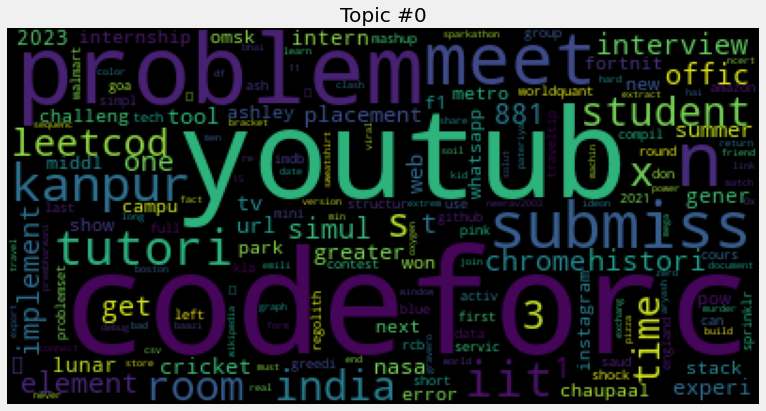

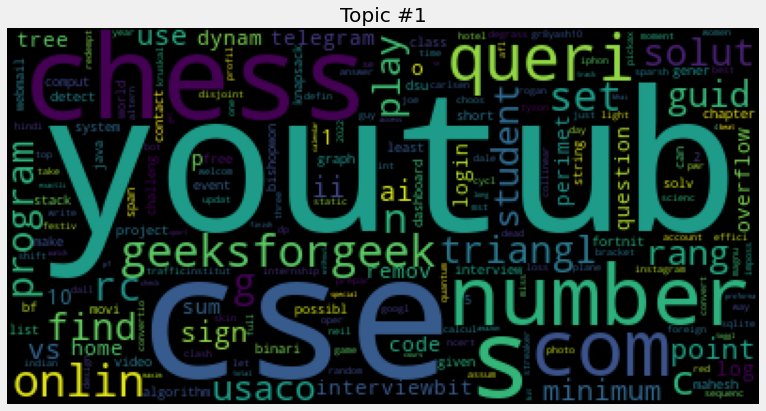

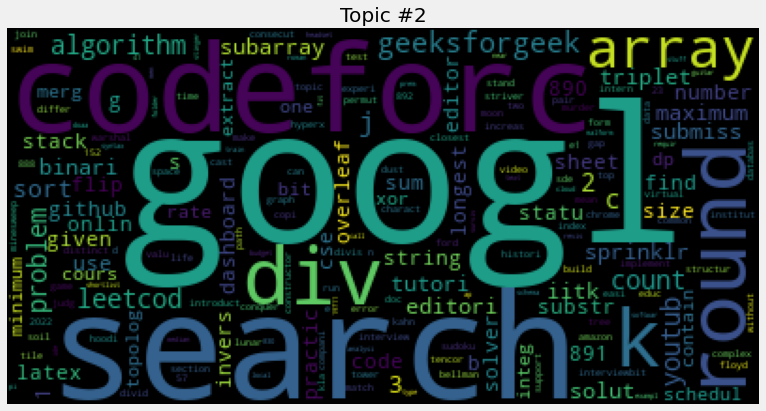

In [633]:
from wordcloud import WordCloud, STOPWORDS
for t in range(ldamodel.num_topics):
    diction={}
    for i in ldamodel.show_topic(t, 200):
        diction[i[0]]=i[1]
    plt.figure(figsize=(12,8))
    plt.imshow(WordCloud().fit_words(diction))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    #plt.savefig('topic #' + str(t) + '.png', bbox_inches='tight')
    plt.show()

In [634]:
topic = [0]*len(data)
for idx in range(len(data)):
    test_idx = doc_set.index(data.Domain[idx])
    probs = ldamodel[dictionary.doc2bow(texts[test_idx])]
    prs = [item for sublist in probs for item in sublist]
    topicProbs = []
    for i in probs:
        topicProbs.append(i[1])
    topic[idx] = np.argmax(np.asarray(topicProbs))

In [635]:
data['Topic'] = topic

In [636]:
data.head()

,URL,Domain,Topic
Time,,,
2023-08-12 17:55:46,https://nwm.iitk.ac.in/?_task=mail&_mbox=INBOX,b'IIT Kanpur Webmail :: Welcome to IIT Kanpur ...,0
2023-08-12 17:54:22,file:///C:/Users/pc/Downloads/311d467bf903b3ad...,Null,0
2023-08-12 17:52:55,https://codeforces.com/contest/1859/problem/D,b'Problem - D - Codeforces',2
2023-08-12 17:52:50,https://codeforces.com/contest/1859,b'Dashboard - Codeforces Round 892 (Div. 2) - ...,2
2023-08-12 17:52:01,https://placement.iitk.ac.in/student/rc/5/cale...,b'RC - Events - Calendar',1


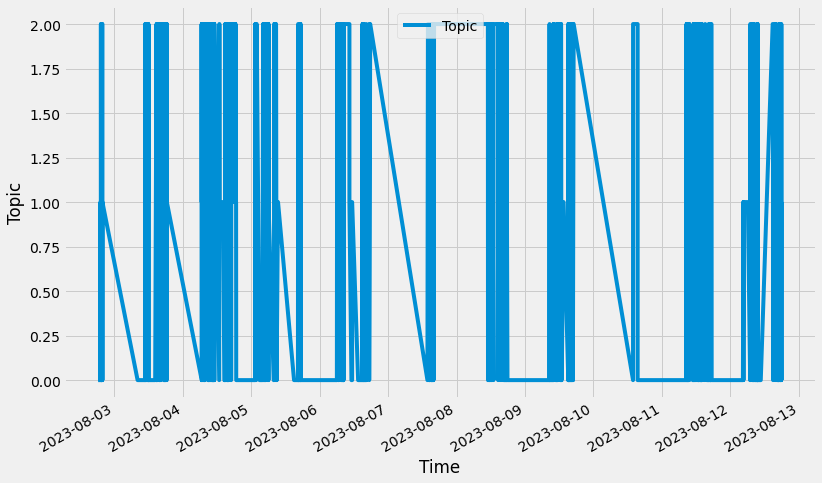

In [637]:
sorted_data = data.sort_index()
plt.style.use('fivethirtyeight')
sorted_data.plot(y='Topic', figsize=(12,8))  # Remove x argument
plt.ylabel('Topic')
plt.xlabel('Time')  # Add x-axis label
plt.show()


In [638]:
cp_data = data
cp_data.index = pd.to_datetime(cp_data.index)  # Convert index to datetime


In [639]:
cp_data.head()

,URL,Domain,Topic
Time,,,
2023-08-12 17:55:46,https://nwm.iitk.ac.in/?_task=mail&_mbox=INBOX,b'IIT Kanpur Webmail :: Welcome to IIT Kanpur ...,0
2023-08-12 17:54:22,file:///C:/Users/pc/Downloads/311d467bf903b3ad...,Null,0
2023-08-12 17:52:55,https://codeforces.com/contest/1859/problem/D,b'Problem - D - Codeforces',2
2023-08-12 17:52:50,https://codeforces.com/contest/1859,b'Dashboard - Codeforces Round 892 (Div. 2) - ...,2
2023-08-12 17:52:01,https://placement.iitk.ac.in/student/rc/5/cale...,b'RC - Events - Calendar',1


In [640]:
occurrences = []
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
for day in weekdays:
    tlist = cp_data[cp_data.index.day_name() == day].Topic.tolist()
    res = np.histogram(tlist,bins=[0,1,2,3])
    occurrences.append(list(res[0]))

In [641]:
t0 = [0]*len(occurrences)
t1 = [0]*len(occurrences)
t2 = [0]*len(occurrences)

for d in range(len(occurrences)):
    t0[d] = occurrences[d][0]
    t1[d] = occurrences[d][1]
    t2[d] = occurrences[d][2]

cumt1 = [sum(x) for x in zip(t0, t1)]

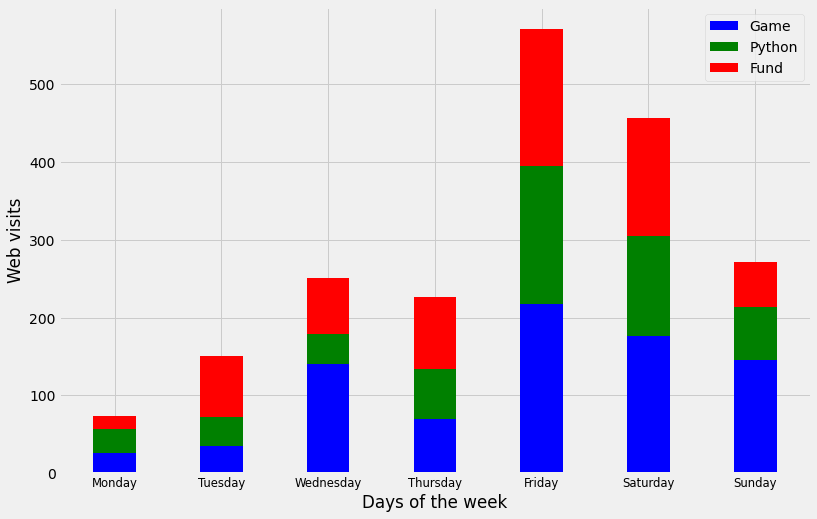

In [642]:
plt.figure(figsize=(12,8))
p0 = plt.bar(range(7), t0, 0.4, label='Game', color = 'blue')
p1 = plt.bar(range(7), t1, 0.4,bottom=t0, color='green', label='Python')
p2 = plt.bar(range(7), t2, 0.4, bottom=cumt1, color='red', label='Fund')
plt.xticks(range(7), weekdays, size='small')
plt.xlabel('Days of the week')
plt.ylabel('Web visits')
plt.legend()
plt.show()

In [650]:
cp_data = cp_data.drop(['URL','Domain'],axis=1)
new_index=[]
for i in cp_data.index:
    new_index.append(str(i).split(" ")[1])
new_index2=[]
for i in new_index:
    new_index2.append(str(i).split(":")[0])
new_index2

['17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '16',
 '16',
 '16',
 '16',
 '16',
 '16',
 '16',
 '16',
 '16',
 '16',
 '16',
 '16',
 '16',
 '16',
 '16',
 '16',
 '16',
 '16',
 '16',
 '16',
 '16',
 '16',
 '16',
 '16',
 '16',
 '16',
 '16',
 '16',
 '16',
 '15',
 '15',
 '15',
 '15',
 '15',
 '15',
 '15',
 '15',
 '15',
 '15',
 '15',
 '15',
 '15',
 '15',
 '15',
 '15',
 '15',
 '15',
 '15',
 '15',
 '15',
 '15',
 '14',
 '14',
 '10',
 '10',
 '10',
 '10',
 '09',
 '09',
 '09',
 '09',
 '09',
 '09',
 '09',
 '09',
 '09',
 '09',
 '09',
 '09',
 '09',
 '09',
 '09',
 '09',
 '09',
 '09',
 '09',
 '09',
 '09',
 '09',
 '09',
 '09',
 '09',
 '09',

In [656]:
# Add the list as a new column named 'X'
cp_data.index= new_index2
cp_data['X'] = new_index2
cp_data

,Topic,X
17,0,17
17,0,17
17,2,17
17,2,17
17,1,17
...,...,...
19,0,19
19,1,19
19,0,19
19,0,19


In [657]:
topic_labels = {0: 'Game', 1: 'Python', 2: 'Fund'}
cp_data['Topic'] = cp_data['Topic'].map(topic_labels)

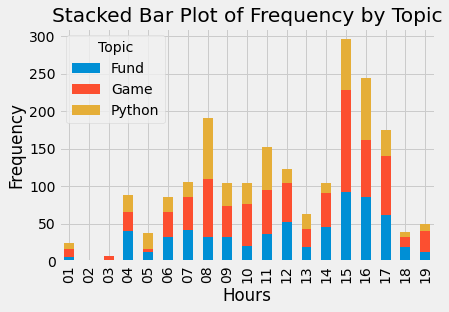

In [659]:
pivot_data = cp_data.pivot_table(index='X', columns='Topic', aggfunc='size', fill_value=0)
pivot_data.plot(kind='bar', stacked=True)
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Stacked Bar Plot of Frequency by Topic')
plt.legend(title='Topic')
plt.show()
